In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import os
import matplotlib.pyplot as plt
from numpy import exp, abs, log
import pickle
from metrics import *

import universal as up
from universal import tools, algos
from universal.algos import *

<AxesSubplot:>

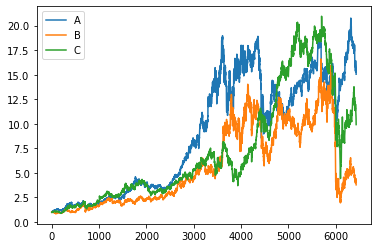

In [2]:
data = tools.dataset('nyse_n')

# plot first three of them as example
data.iloc[:,:3].plot()

In [3]:
data

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
0,0.997510,0.986480,0.992200,0.991950,0.956880,0.986380,0.984860,0.978110,0.988890,0.990430,...,0.986190,1.002620,1.033330,0.986090,0.990710,0.996830,0.984500,0.986840,0.996710,1.008920
1,1.007425,1.000005,0.994165,1.002008,0.935274,0.990937,0.977286,0.953452,0.993360,0.968106,...,0.972314,1.010491,1.100000,0.973912,0.973422,0.993660,0.984500,0.980258,0.950821,1.000001
2,1.004937,0.969574,0.978586,0.999994,0.913669,0.986379,0.969712,0.945233,0.988890,0.963323,...,0.989622,0.994747,1.066670,0.965224,0.965421,0.992060,0.990712,0.982454,0.947532,1.004481
3,1.007419,0.966191,0.966931,1.005974,0.906497,1.009115,0.972224,0.948003,1.000005,0.969700,...,0.989622,0.992121,1.100004,0.975659,0.961424,1.001604,0.982925,0.995609,0.934418,1.008921
4,1.019790,0.986481,0.961091,1.007986,0.884895,1.022738,0.964650,0.958905,1.002165,0.974481,...,0.999993,0.997369,1.133334,0.979132,0.962779,0.992059,0.984498,0.999999,0.904909,1.017880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6426,15.262335,4.197488,10.679824,33.869485,14.257315,9.699679,10.831698,10.000294,12.865341,0.040662,...,44.316041,20.060604,1.992866,0.448270,29.314446,17.080096,81.836564,17.722527,10.744335,33.968993
6427,15.474311,4.235303,10.705192,32.823324,14.257315,9.699679,10.861374,10.000294,12.779572,0.040662,...,43.646839,19.930761,2.154450,0.448270,29.561478,17.255052,82.254098,17.399766,10.951319,33.874107
6428,15.368323,4.159673,10.552986,33.346405,13.861278,9.854256,10.742670,9.719912,12.865341,0.040662,...,44.167329,20.028143,2.046727,0.439122,29.561478,17.255052,84.759299,17.634501,10.781969,33.684337
6429,15.050358,3.894966,10.121734,32.888709,13.267224,9.313238,10.445912,9.159148,12.350727,0.040662,...,44.018618,19.768459,2.019796,0.402528,29.149758,17.145704,83.089165,17.546476,10.349185,33.399680


In [4]:
df_close = log(data)
ll = df_close.shape[0]

for i in list(range(1, ll))[::-1]:
    df_close.iloc[i] -= df_close.iloc[i-1]

In [5]:
df_close

,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
0,-0.002493,-0.013612,-0.007831,-0.008083,-0.044077,-0.013714,-0.015256,-0.022133,-0.011172,-0.009616,...,-0.013906,0.002617,0.032787,-0.014008,-0.009333,-0.003175,-0.015621,-0.013247,-0.003295,0.008880
1,0.009891,0.013617,0.001978,0.010089,-0.022839,0.004609,-0.007720,-0.025533,0.004510,-0.022798,...,-0.014170,0.007819,0.062524,-0.012427,-0.017604,-0.003185,0.000000,-0.006692,-0.047134,-0.008879
2,-0.002473,-0.030903,-0.015794,-0.002012,-0.023371,-0.004611,-0.007780,-0.008657,-0.004510,-0.004952,...,0.017643,-0.015703,-0.030769,-0.008960,-0.008254,-0.001611,0.006290,0.002237,-0.003466,0.004470
3,0.002467,-0.003496,-0.011981,0.005962,-0.007881,0.022788,0.002587,0.002926,0.011177,0.006598,...,0.000000,-0.002643,0.030772,0.010752,-0.004149,0.009574,-0.007891,0.013301,-0.013937,0.004410
4,0.012205,0.020783,-0.006058,0.001998,-0.024119,0.013410,-0.007821,0.011434,0.002158,0.004918,...,0.010425,0.005276,0.029850,0.003554,0.001409,-0.009576,0.001599,0.004400,-0.032089,0.008841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6426,-0.027399,-0.026668,-0.018824,-0.007692,-0.060625,-0.039067,-0.018997,-0.027652,-0.019803,0.000000,...,0.006734,-0.008058,-0.013423,-0.020203,0.005634,-0.025286,-0.005089,-0.008244,-0.020798,-0.034320
6427,0.013793,0.008969,0.002372,-0.031375,0.000000,0.000000,0.002736,0.000000,-0.006689,0.000000,...,-0.015216,-0.006494,0.077962,0.000000,0.008392,0.010191,0.005089,-0.018380,0.019081,-0.002797
6428,-0.006873,-0.018019,-0.014320,0.015811,-0.028171,0.015811,-0.010989,-0.028438,0.006689,0.000000,...,0.011854,0.004874,-0.051293,-0.020619,0.000000,0.000000,0.030002,0.013401,-0.015585,-0.005618
6429,-0.020907,-0.065751,-0.041724,-0.013821,-0.043803,-0.056467,-0.028013,-0.059423,-0.040822,0.000000,...,-0.003373,-0.013051,-0.013245,-0.087011,-0.014025,-0.006357,-0.019901,-0.005004,-0.040967,-0.008487


In [7]:
cp = df_close
for phs in range(0, 100000):
    ntrain = 300
    ntest = 100
    win = 5
    nstock = df_close.shape[1]
    choice = np.arange(nstock)
    
    train_st = phs*ntest
    train_ed = test_st = phs*ntest+ntrain
    test_st = phs*ntest+ntrain-win
    test_ed = phs*ntest+ntrain+ntest
    if test_ed > ll:
        break
    print('Phase: %d'%phs)
    
    cp_train = cp.iloc[train_st:train_ed, :]
    cp_test = cp.iloc[test_st:test_ed, :]

    cp_trainx = np.zeros((ntrain - win, win * nstock))
    cp_trainy = np.zeros((ntrain - win, nstock))

    cov_train = np.cov(np.exp(cp_train.to_numpy().T))
    
    for i in range(win, ntrain):
        cp_trainy[i - win] = cp_train.to_numpy()[i]
        for s in range(nstock):
            cp_trainx[i - win, s * win:(s + 1) * win] = cp_train.to_numpy()[i - win:i, s]

    cp_testx = np.zeros((ntest, win * nstock))
    cp_testy = np.zeros((ntest, nstock))

    for i in range(win, ntest + win):
        cp_testy[i - win] = cp_test.to_numpy()[i]
        for s in range(nstock):
            cp_testx[i - win, s * win:(s + 1) * win] = cp_test.to_numpy()[i - win:i, s]

    np.savez('./stock_data/NYSE_N_stock_phase%02d_lb%d' % (phs, win), rt_trainx=cp_trainx, rt_trainy=cp_trainy,  \
             rt_valx=None, rt_valy=None,  \
             rt_testx=cp_testx, rt_testy=cp_testy, choice=choice, cov_train=cov_train)
    
#     print(np.min(cov_train))

Phase: 0
Phase: 1
Phase: 2
Phase: 3
Phase: 4
Phase: 5
Phase: 6
Phase: 7
Phase: 8
Phase: 9
Phase: 10
Phase: 11
Phase: 12
Phase: 13
Phase: 14
Phase: 15
Phase: 16
Phase: 17
Phase: 18
Phase: 19
Phase: 20
Phase: 21
Phase: 22
Phase: 23
Phase: 24
Phase: 25
Phase: 26
Phase: 27
Phase: 28
Phase: 29
Phase: 30
Phase: 31
Phase: 32
Phase: 33
Phase: 34
Phase: 35
Phase: 36
Phase: 37
Phase: 38
Phase: 39
Phase: 40
Phase: 41
Phase: 42
Phase: 43
Phase: 44
Phase: 45
Phase: 46
Phase: 47
Phase: 48
Phase: 49
Phase: 50
Phase: 51
Phase: 52
Phase: 53
Phase: 54
Phase: 55
Phase: 56
Phase: 57
Phase: 58
Phase: 59
Phase: 60
